In [1]:
import py_tiamat
import numpy
from matplotlib import pyplot
from tqdm import tqdm

In [2]:
py_tiamat.generate_d2s([3,3])

[9, 18, 9]

In [3]:
py_tiamat.gen_cycles_for_perm([0,2,1,3,6,5,4])

[[0], [1, 2], [3], [4, 6], [5]]

In [4]:
py_tiamat.make_cycles_mat(2)

[[[[0], [1]], [[0, 1]]], [[[0, 1]], [[0], [1]]]]

In [5]:
ngs, perms, norms = py_tiamat.generate_uniform_states(4,3,[4,4])

In [6]:
ngs

array([[[0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0]],

       ...,

       [[2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2]],

       [[2, 2, 2],
        [2, 2, 2]]], dtype=uint64)

In [7]:
perms

array([0, 1, 2, ..., 3, 4, 5], dtype=uint64)

In [8]:
norms

array([4096., 4096., 4096., ..., 4096., 4096., 4096.])

In [9]:
len(norms)

4374

In [10]:
overlap = py_tiamat.make_uniform_perm_overlap_matrix(4,3,[4,4])
overlap.shape

(4374, 4374)

In [11]:
eigs = numpy.linalg.eigvalsh(overlap)
eigs

array([-0.50195313, -0.50195313, -0.50195313, ...,  1.00390625,
        1.01174927,  1.01174927])

In [12]:
len(eigs[eigs>0.988])

750

In [13]:
(3*2*1) * (5**3)

750

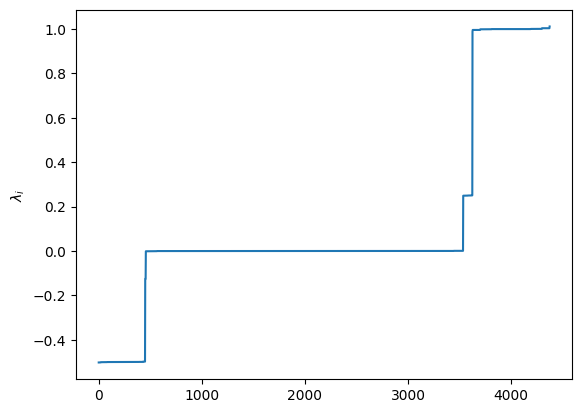

In [14]:
pyplot.plot(eigs)
pyplot.ylabel(r'$\lambda_i$')
pyplot.show()

In [15]:
eigs[eigs<0.988]

array([-0.50195313, -0.50195313, -0.50195313, ...,  0.25065175,
        0.25065175,  0.25114151])

# Mixed

In [16]:
ngs, perms, norms = py_tiamat.generate_states(4,3,[6,6])

In [17]:
norms.shape

(26244,)

In [18]:
all_eigs = []
n_sectors = [[na,nb,nc] for na in range(5) for nb in range(5) for nc in range(5)]

for nsector in tqdm(n_sectors):
    overlap_mat = py_tiamat.make_overlap_matrix(4,3,[6,6],n_sector=nsector)
    eigs = numpy.linalg.eigvalsh(overlap_mat)
    all_eigs.append(eigs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:03<00:00, 38.59it/s]


In [19]:
flat_eigs = numpy.array([x for xs in all_eigs for x in xs])

In [20]:
len(flat_eigs[flat_eigs>0.9])

750

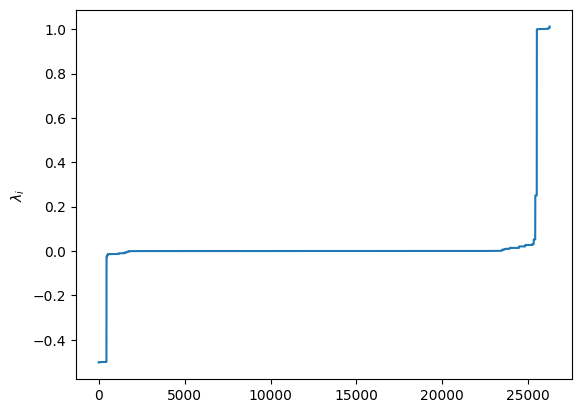

In [21]:
pyplot.plot(sorted(flat_eigs))
pyplot.ylabel(r'$\lambda_i$')
pyplot.show()

# Orthogonal

In [5]:
all_eigs = []
n_sectors = [[na,nb,nc] for na in range(5) for nb in range(5) for nc in range(5)]

for nsector in tqdm(n_sectors):
    overlap_mat = py_tiamat.make_ortho_overlap_matrix(4,3,[2,2],n_sector=nsector)
    eigs = numpy.linalg.eigvalsh(overlap_mat)
    all_eigs.append(eigs)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 125/125 [00:05<00:00, 22.44it/s]


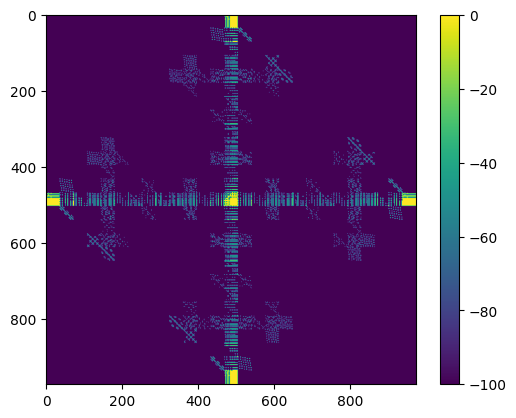

In [43]:
overlap_mat = py_tiamat.make_ortho_overlap_matrix(4,3,[2,2],n_sector=(2,2,2))
abs_overlap = numpy.abs(overlap_mat)
abs_overlap[abs_overlap < 1e-12] = -100
pyplot.imshow(abs_overlap, interpolation=None)
pyplot.colorbar()

In [25]:
numpy.abs(overlap_mat).min()

0.0

In [48]:
flat_eigs = numpy.array([x for xs in all_eigs for x in xs])

In [49]:
len(flat_eigs[flat_eigs>0.9999])

750

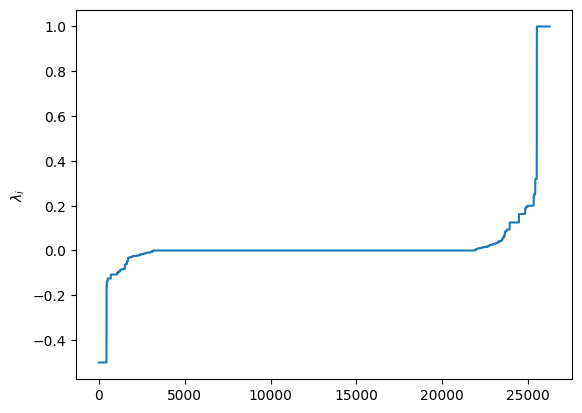

In [50]:
pyplot.plot(sorted(flat_eigs))
pyplot.ylabel(r'$\lambda_i$')
pyplot.show()